## To do for June 7th:

Overall objective is to understand what factors affect soil thawing. We will apply exploratory data analysis (i.e. plotting data creatively). Tasks:

Andrew - create a function to plot zero degree isotherms

Ines - create a function that plots the time from start to end of thaw for different years

Seth - create a plot of snow depth vs time, for the thaw period

Sujan - create a plot of water table depth, for the thaw period

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import saveload as sl
import pandas as pd
from datetime import datetime, timedelta 

In [2]:
def GetThawDate(ts,year):
    """
       - objective : 
       
       Take a temperature for a year with temperature greater than or equal to 0 and  indexed in order
       
       
       -Parameters: 
       The parameter that is used here are the year (year) of the time series data and the time series (ts) of

       -Returns:
        thawdate(yyyy:mm:dd  hr:mm:ss) is in the form of the year that is returned
   """
    AnnualTemp=ts[str(year)]
    Thawed=AnnualTemp[AnnualTemp>=0]
    thawdate=Thawed.index[0]
    return thawdate

In [3]:
def TemFun(df,year,depth,delay=30):
    """
        -Objective: 
        Plot for temperature vs time. This plot uses a time window based 
        On the end and start date. The dates end and start use the thawdate date. The thawdate date represents the time
        in which the thawing process starts
        -Parameters:
        df: Dataframe with the WISKI data information
        year: year for which do you want to create the plot
        depth: in centimetres. Depth for the measurements. Pick from: 002, 005, 010, 020, 050, 100
        delay: (=30) in days. Time to delay to catch the thawing beginnign delay with the depth

        -Returns:
        A plot in format .png from the temperature vs time. One single line for the specified year.
        """
    column='SoilTemp_'+depth+'cmNW'
    thawdate=GetThawDate(df[column],year)
    end=thawdate+timedelta(days = delay) 
    start=thawdate+timedelta(days = -7)
    Temp=df[start:end]
    plt.plot(Temp[column],label='')
    plt.xlabel("Time (days)")    
    plt.ylabel("Depth (meter)")
    

In [4]:
def ZeroDegIso(df,z,start,end,include_cbar=True):
    """
    Objective: produce a contour plot of the zero degree soil temperature isotherm
    
    Parameters: df = dataframe containing time series temperature data, with time index
                z = array of depths
                start = start date
                end = end date
                include_cbar (optional) = set to true to add a colorbar for freezing temperatures
                
    Returns: no output, just a plot on the current axes
                
    """

    # Get the data:
    t=df[start:end].index
    Temp=df[start:end].values
    
    # Add contour plot:   
    C=plt.contourf(t,z,Temp.T,np.arange(-10,0.1,1),cmap=plt.cm.Blues)
    plt.contourf(t,z,Temp.T,np.arange(0,30,1),cmap=plt.cm.Reds)
    plt.contour(t,z,Temp.T,np.arange(0,1),colors='black')
    plt.ylim(z[-1],0)
    plt.xlim(start,end)
    
    if include_cbar:
        ax=plt.gca()
        pos=ax.get_position().bounds
        pos=[0.1,0.23,0.8,0.7]
        ax.set_position(pos)
        poscb=[0.1,0.04,0.8,0.04]
        cnew=plt.axes(poscb)
        plt.colorbar(C,orientation="horizontal",cax=cnew)
        plt.title(r'Temperature $^\circ$C',fontsize=12)

In [6]:
# Load dataframe of Temperature at different depths:
df=sl.load('../../data/OJP/OJP_NW_T.pkl')

/Users/ani378/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


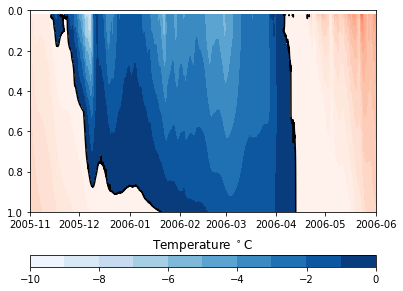

In [7]:
z=np.array([0.02,0.05,0.1,0.2,0.5,1.0])
start='2005-11-01'
end='2006-06-01'
ZeroDegIso(df,z,start,end)

In [ ]:
# Set the depth: 002 005 010 020 050 100
TemFun(df,2006,'020')

In [ ]:
TemFun(df,2008,'020',delay=50)

In [ ]:
plt.axes()
ax=plt.gca()
pos=ax.get_position().bounds
pos=[pos[0],0.8,pos[2],pos[3]]
ax.set_position(pos)